In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame as df
from scipy.stats import zscore
import seaborn as sns

from ydata_profiling import ProfileReport
import sweetviz as sv

In [13]:
df = pd.read_csv("./data/test.csv", na_values=' ', low_memory=False)
#print(df.dtypes)

#df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
def try_convert(value):
    try:
        return pd.to_numeric(value)  # Tenta converter para número
    except ValueError:
        try:
            return pd.to_datetime(value)  # Tenta converter para data
        except ValueError:
            return value  # Retorna o valor original se não puder converter


df.reset_index(drop=True, inplace=True)
df = df.map(try_convert)

df.dropna(inplace=True)

df.reset_index(drop=True, inplace=True)
print(df)

C:\Users\ModalGR\AppData\Local\Temp\ipykernel_20924\1230314441.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(try_convert)


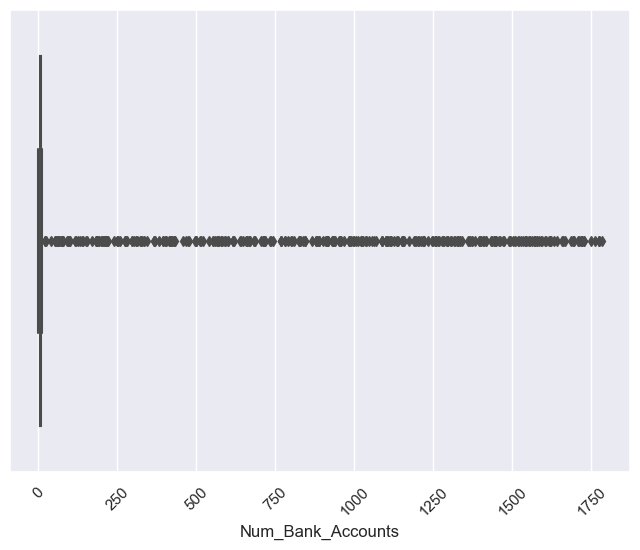

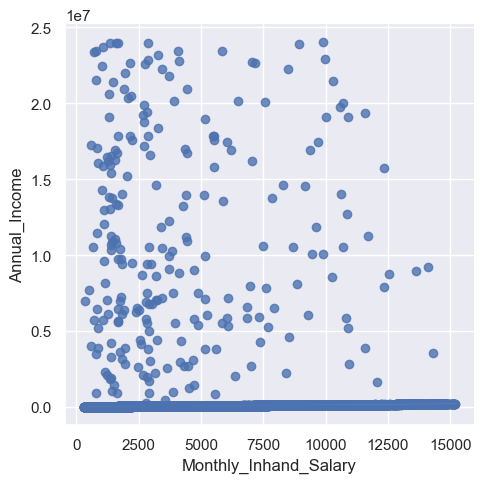

c:\Users\ModalGR\Desktop\AI-Model-Test\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


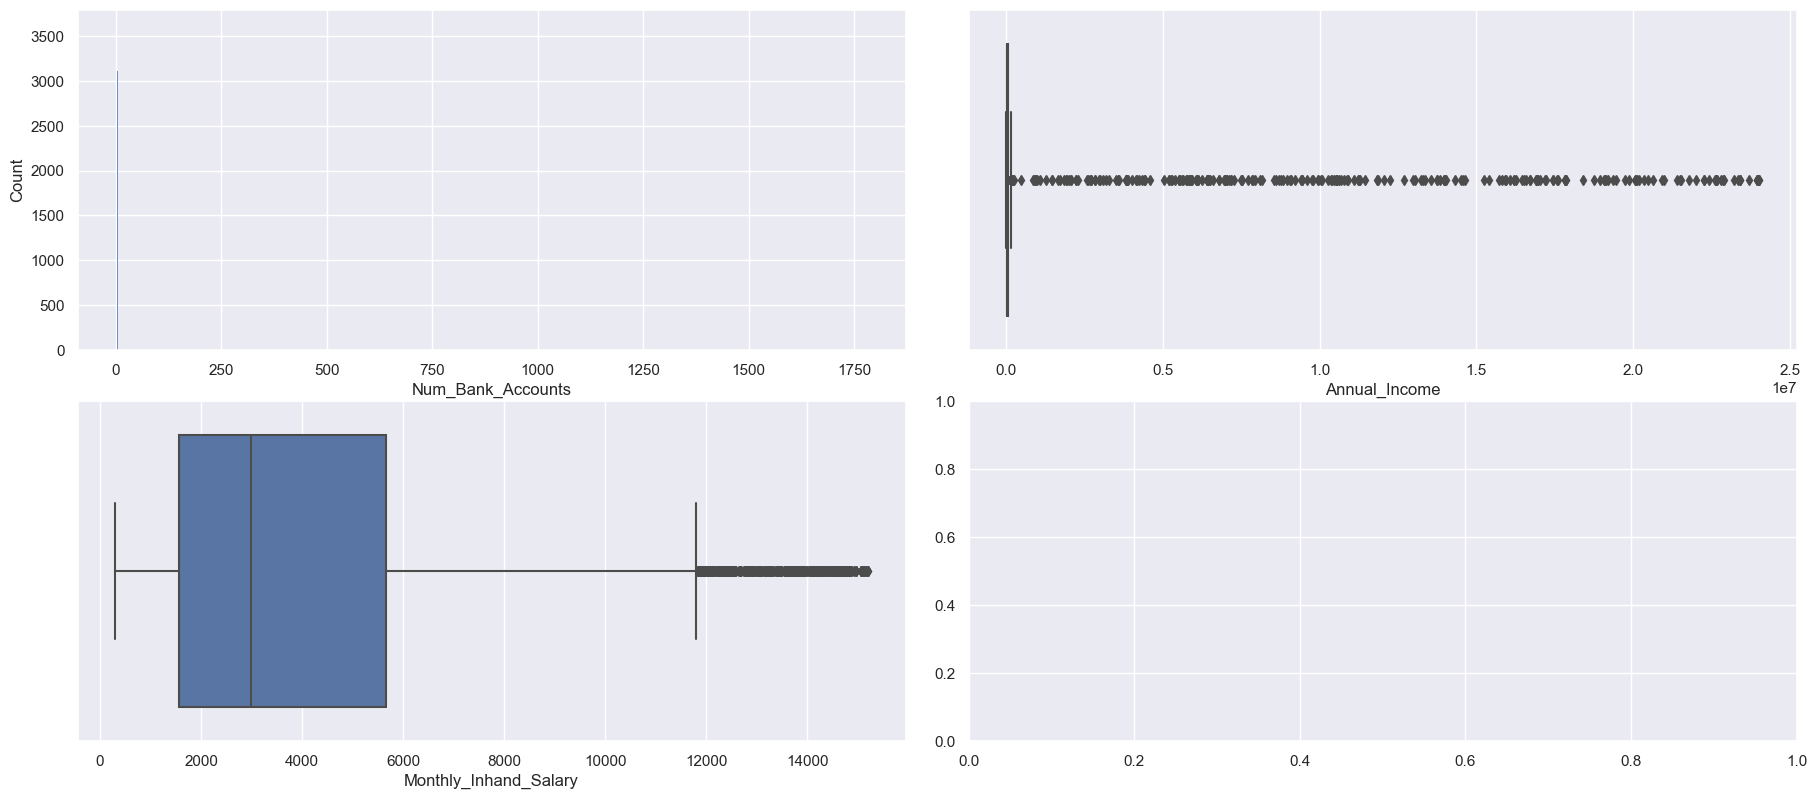

In [11]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")

# sns.histplot(data=df, x='Annual_Income')
# plt.show()

# sns.histplot(data=df, x='Occupation')
# plt.show()

sns.boxplot(data=df, x='Num_Bank_Accounts')
plt.show()

# sns.boxplot(data=df, x='Payment_Behaviour')
# plt.show()

sns.lmplot(data=df, x='Monthly_Inhand_Salary', y='Annual_Income')
plt.show()

fig, graph = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))
plt.tight_layout()

sns.histplot(data=df, x='Num_Bank_Accounts', ax=graph[0][0])
sns.boxplot(data=df, x='Annual_Income', ax=graph[0][1])
sns.boxplot(data=df, x='Monthly_Inhand_Salary', ax=graph[1][0])
# sns.histplot(data=df, x='Occupation', ax=graph[1][1])
#sns.lmplot(data=df, x='Altura', y='Peso', )
#sns.lmplot(data=df, x='Altura', y='Peso', ax=graph[1][1])
plt.show()
